<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf

In [27]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0 , X_test / 255.0
print("x_train.shape : " , X_train.shape)

x_train.shape :  (60000, 28, 28)


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [32]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8609 - loss: 0.4806 - val_accuracy: 0.9588 - val_loss: 0.1409
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9552 - loss: 0.1508 - val_accuracy: 0.9684 - val_loss: 0.1040
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9664 - loss: 0.1108 - val_accuracy: 0.9748 - val_loss: 0.0808
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9739 - loss: 0.0838 - val_accuracy: 0.9764 - val_loss: 0.0754
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9775 - loss: 0.0748 - val_accuracy: 0.9782 - val_loss: 0.0741
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9803 - loss: 0.0653 - val_accuracy: 0.9790 - val_loss: 0.0721
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0555 - val_accuracy: 0.9786 - val_loss: 0.0683
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9836 - loss: 0.0506

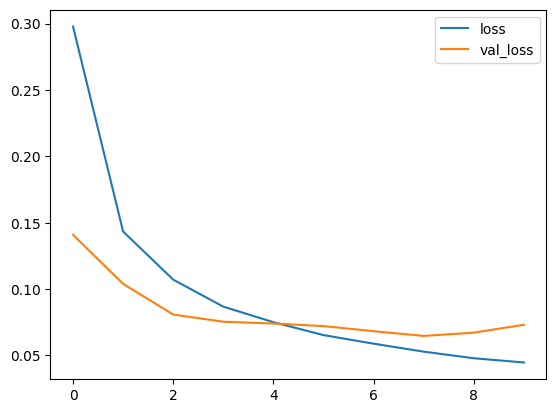

In [33]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

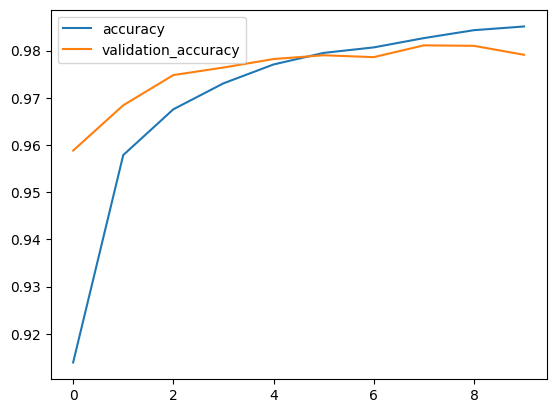

In [34]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='validation_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix without normalization
[[ 971    1    0    2    1    1    2    1    1    0]
 [   0 1126    3    1    0    1    2    0    2    0]
 [   4    1 1004    6    2    0    1    8    5    1]
 [   0    0    1 1001    0    1    0    3    4    0]
 [   2    1    1    0  968    0    3    0    0    7]
 [   2    0    0   13    4  870    1    0    1    1]
 [   2    3    1    1    4    3  944    0    0    0]
 [   2    9    5    3    2    1    0  997    2    7]
 [   6    1    1   14    6    7    2    2  931    4]
 [   2    2    0    8   12    2    0    3    1  979]]


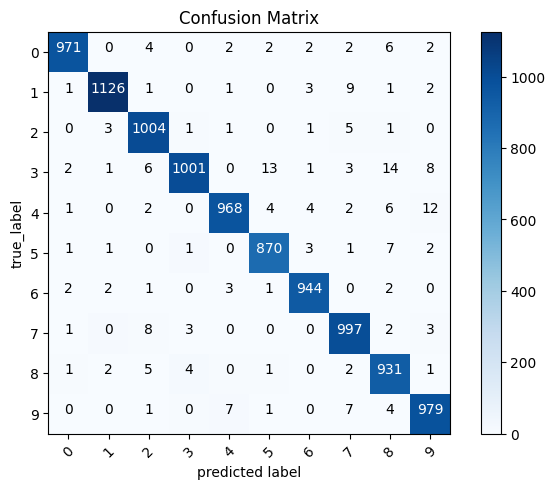

In [35]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap= plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix without normalization')
    print(cm)

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(i,j,format(cm[i,j],fmt), horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black' )

    plt.tight_layout()
    plt.ylabel('true_label')
    plt.xlabel('predicted label')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))



Text(0.5, 1.0, 'True Label: 4, Predicted: 9')

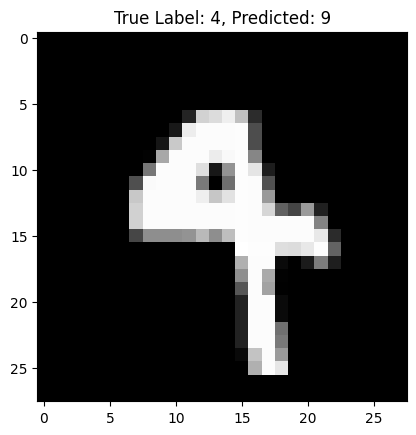

In [39]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title("True Label: %s, Predicted: %s" % (y_test[i], p_test[i]))
